In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Загрузка данных
data_path = "C:/Users/Les/Downloads/coursework/data/processed/processed_data.csv"
data = pd.read_csv(data_path)

# Обработка пропусков (если есть)
data.dropna(inplace=True)

# Преобразование столбца Date в datetime
data['Date (LT)'] = pd.to_datetime(data['Date (LT)'])

# Извлечение дополнительных признаков
data['Year'] = data['Date (LT)'].dt.year
data['Month'] = data['Date (LT)'].dt.month
data['Day'] = data['Date (LT)'].dt.day
data['Hour'] = data['Date (LT)'].dt.hour

# Преобразование категориальных данных (например, AQI Category) в числа
label_encoder = LabelEncoder()
data['AQI Category'] = label_encoder.fit_transform(data['AQI Category'])

# Выделение признаков и целевых переменных
X = data[['NowCast Conc.', 'Year', 'Month', 'Day', 'Hour']]
y_reg = data['AQI']  # Для задачи регрессии
y_class = data['AQI Category']  # Для задачи классификации

# Разделение данных на обучающую и тестовую выборки
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Масштабирование данных для регрессии
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Масштабирование данных для классификации
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

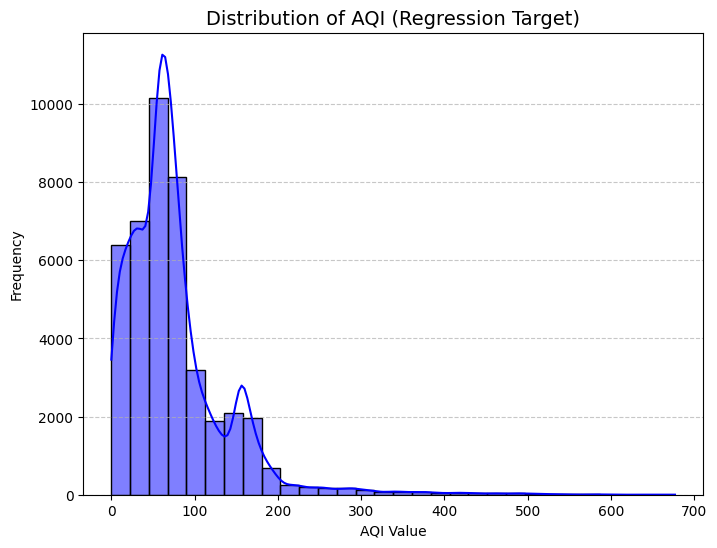

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма целевой переменной для регрессии (AQI)
plt.figure(figsize=(8, 6))
sns.histplot(y_reg, kde=True, bins=30, color='blue')
plt.title('Distribution of AQI (Regression Target)', fontsize=14)
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Соответствие чисел и названий категорий:
0: Good
1: Hazardous
2: Moderate
3: Unhealthy
4: Unhealthy for Sensitive Groups
5: Very Unhealthy

Распределение категорий AQI с названиями:
AQI Category
Moderate                          18941
Good                              14547
Unhealthy for Sensitive Groups     4069
Unhealthy                          3898
Very Unhealthy                      848
Hazardous                           552
Name: count, dtype: int64


C:\Users\Les\AppData\Local\Temp\ipykernel_22492\3500225711.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_class, palette='viridis')


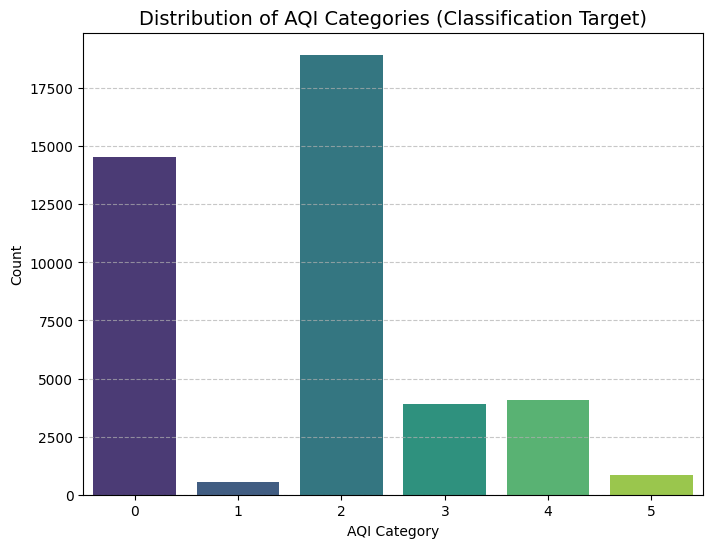

In [9]:
# Получение оригинальных названий категорий
category_mapping = dict(enumerate(label_encoder.classes_))
print("Соответствие чисел и названий категорий:")
for code, name in category_mapping.items():
    print(f"{code}: {name}")

# Распределение категорий с названиями
category_counts_named = data['AQI Category'].map(category_mapping).value_counts()
print("\nРаспределение категорий AQI с названиями:")
print(category_counts_named)

plt.figure(figsize=(8, 6))
sns.countplot(x=y_class, palette='viridis')
plt.title('Distribution of AQI Categories (Classification Target)', fontsize=14)
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Train Metrics:
MAE: 0.00
RMSE: 0.11
R2: 1.00

Test Metrics:
MAE: 0.01
RMSE: 0.44
R2: 1.00



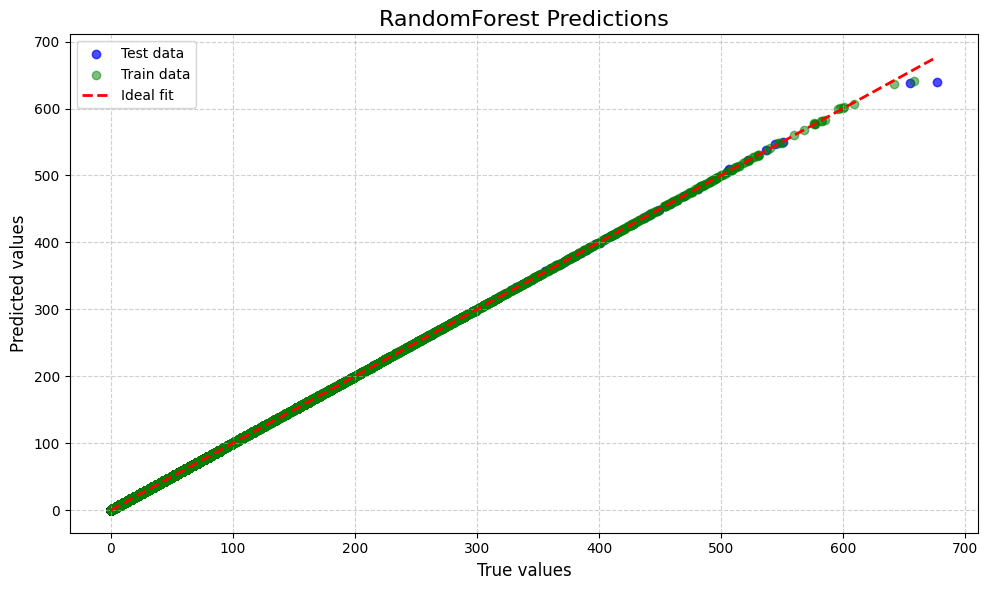

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Обучение модели
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg_scaled, y_train_reg)

# Прогнозирование на обучающих данных
y_train_pred_rf_reg = rf_reg.predict(X_train_reg_scaled)

# Оценка на обучающих данных
mae_train_rf_reg = mean_absolute_error(y_train_reg, y_train_pred_rf_reg)
rmse_train_rf_reg = np.sqrt(mean_squared_error(y_train_reg, y_train_pred_rf_reg))
r2_train_rf_reg = r2_score(y_train_reg, y_train_pred_rf_reg)

# Прогнозирование на тестовых данных
y_test_pred_rf_reg = rf_reg.predict(X_test_reg_scaled)

# Оценка на тестовых данных
mae_test_rf_reg = mean_absolute_error(y_test_reg, y_test_pred_rf_reg)
rmse_test_rf_reg = np.sqrt(mean_squared_error(y_test_reg, y_test_pred_rf_reg))
r2_test_rf_reg = r2_score(y_test_reg, y_test_pred_rf_reg)

# Вывод метрик
print("Train Metrics:")
print(f"MAE: {mae_train_rf_reg:.2f}")
print(f"RMSE: {rmse_train_rf_reg:.2f}")
print(f"R2: {r2_train_rf_reg:.2f}\n")

print("Test Metrics:")
print(f"MAE: {mae_test_rf_reg:.2f}")
print(f"RMSE: {rmse_test_rf_reg:.2f}")
print(f"R2: {r2_test_rf_reg:.2f}\n")

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_test_pred_rf_reg, color='blue', alpha=0.7, label='Test data')
plt.scatter(y_train_reg, y_train_pred_rf_reg, color='green', alpha=0.5, label='Train data')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 
         color='red', linestyle='--', linewidth=2, label='Ideal fit')
plt.title('RandomForest Predictions', fontsize=16)
plt.xlabel('True values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Гиперпараметры для RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

# Оптимизация с помощью GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)
grid_search_rf.fit(X_train_reg_scaled, y_train_reg)

# Лучшая модель
best_rf_model = grid_search_rf.best_estimator_
print("Best Hyperparameters:", grid_search_rf.best_params_)

# Прогнозы на обучающем наборе
y_train_pred_best_rf = best_rf_model.predict(X_train_reg_scaled)

# Метрики на обучающем наборе
mae_train_best_rf = mean_absolute_error(y_train_reg, y_train_pred_best_rf)
rmse_train_best_rf = np.sqrt(mean_squared_error(y_train_reg, y_train_pred_best_rf))
r2_train_best_rf = r2_score(y_train_reg, y_train_pred_best_rf)

# Прогнозы на тестовом наборе
y_test_pred_best_rf = best_rf_model.predict(X_test_reg_scaled)

# Метрики на тестовом наборе
mae_test_best_rf = mean_absolute_error(y_test_reg, y_test_pred_best_rf)
rmse_test_best_rf = np.sqrt(mean_squared_error(y_test_reg, y_test_pred_best_rf))
r2_test_best_rf = r2_score(y_test_reg, y_test_pred_best_rf)

# Вывод метрик
print("\nBest RandomForest Metrics on Training Data:")
print(f"MAE: {mae_train_best_rf:.2f}")
print(f"RMSE: {rmse_train_best_rf:.2f}")
print(f"R2: {r2_train_best_rf:.2f}")

print("\nBest RandomForest Metrics on Testing Data:")
print(f"MAE: {mae_test_best_rf:.2f}")
print(f"RMSE: {rmse_test_best_rf:.2f}")
print(f"R2: {r2_test_best_rf:.2f}")

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

Best RandomForest Metrics on Training Data:
MAE: 0.00
RMSE: 0.11
R2: 1.00

Best RandomForest Metrics on Testing Data:
MAE: 0.01
RMSE: 0.44
R2: 1.00


GradientBoosting - Train Metrics:
MAE: 0.38
RMSE: 0.61
R2: 1.00

GradientBoosting - Test Metrics:
MAE: 0.38
RMSE: 0.67
R2: 1.00



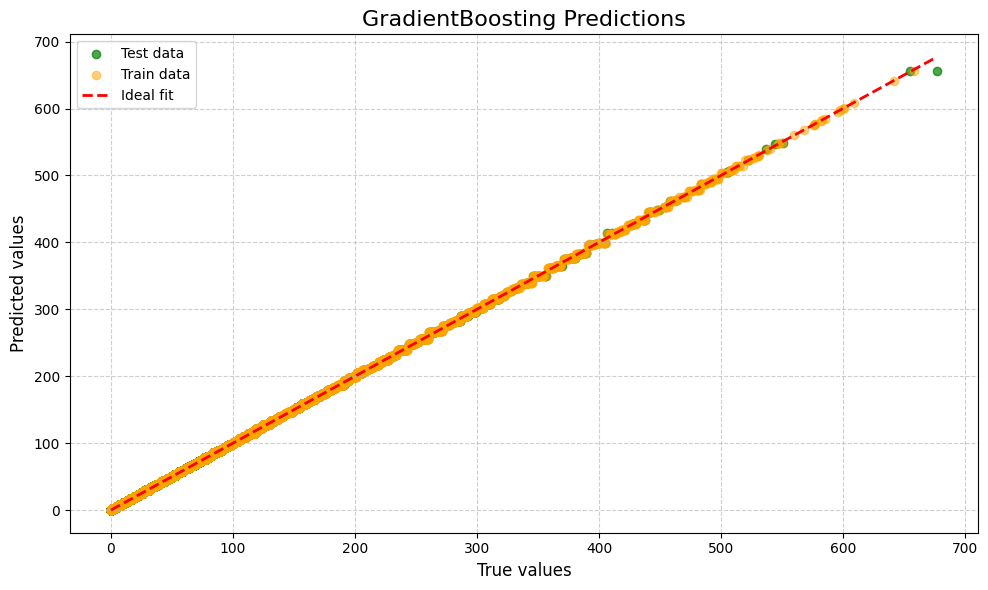

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Обучение модели
gb_reg = GradientBoostingRegressor(random_state=42)
gb_reg.fit(X_train_reg_scaled, y_train_reg)

# Прогнозирование на обучающих данных
y_train_pred_gb_reg = gb_reg.predict(X_train_reg_scaled)

# Оценка на обучающих данных
mae_train_gb_reg = mean_absolute_error(y_train_reg, y_train_pred_gb_reg)
rmse_train_gb_reg = np.sqrt(mean_squared_error(y_train_reg, y_train_pred_gb_reg))
r2_train_gb_reg = r2_score(y_train_reg, y_train_pred_gb_reg)

# Прогнозирование на тестовых данных
y_test_pred_gb_reg = gb_reg.predict(X_test_reg_scaled)

# Оценка на тестовых данных
mae_test_gb_reg = mean_absolute_error(y_test_reg, y_test_pred_gb_reg)
rmse_test_gb_reg = np.sqrt(mean_squared_error(y_test_reg, y_test_pred_gb_reg))
r2_test_gb_reg = r2_score(y_test_reg, y_test_pred_gb_reg)

# Вывод метрик
print("GradientBoosting - Train Metrics:")
print(f"MAE: {mae_train_gb_reg:.2f}")
print(f"RMSE: {rmse_train_gb_reg:.2f}")
print(f"R2: {r2_train_gb_reg:.2f}\n")

print("GradientBoosting - Test Metrics:")
print(f"MAE: {mae_test_gb_reg:.2f}")
print(f"RMSE: {rmse_test_gb_reg:.2f}")
print(f"R2: {r2_test_gb_reg:.2f}\n")

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_test_pred_gb_reg, color='green', alpha=0.7, label='Test data')
plt.scatter(y_train_reg, y_train_pred_gb_reg, color='orange', alpha=0.5, label='Train data')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], 
         color='red', linestyle='--', linewidth=2, label='Ideal fit')
plt.title(f'GradientBoosting Predictions', fontsize=16)
plt.xlabel('True values', fontsize=12)
plt.ylabel('Predicted values', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Гиперпараметры для GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Оптимизация с помощью GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1
)
grid_search_gb.fit(X_train_reg_scaled, y_train_reg)

# Лучшая модель
best_gb_model = grid_search_gb.best_estimator_
print("Best Hyperparameters:", grid_search_gb.best_params_)

# Прогнозы на обучающем наборе
y_train_pred_best_gb = best_gb_model.predict(X_train_reg_scaled)

# Метрики на обучающем наборе
mae_train_best_gb = mean_absolute_error(y_train_reg, y_train_pred_best_gb)
rmse_train_best_gb = np.sqrt(mean_squared_error(y_train_reg, y_train_pred_best_gb))
r2_train_best_gb = r2_score(y_train_reg, y_train_pred_best_gb)

# Прогнозы на тестовом наборе
y_test_pred_best_gb = best_gb_model.predict(X_test_reg_scaled)

# Метрики на тестовом наборе
mae_test_best_gb = mean_absolute_error(y_test_reg, y_test_pred_best_gb)
rmse_test_best_gb = np.sqrt(mean_squared_error(y_test_reg, y_test_pred_best_gb))
r2_test_best_gb = r2_score(y_test_reg, y_test_pred_best_gb)

# Вывод метрик
print("\nBest GradientBoosting Metrics on Training Data:")
print(f"MAE: {mae_train_best_gb:.2f}")
print(f"RMSE: {rmse_train_best_gb:.2f}")
print(f"R2: {r2_train_best_gb:.2f}")

print("\nBest GradientBoosting Metrics on Testing Data:")
print(f"MAE: {mae_test_best_gb:.2f}")
print(f"RMSE: {rmse_test_best_gb:.2f}")
print(f"R2: {r2_test_best_gb:.2f}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Best GradientBoosting Metrics on Training Data:
MAE: 0.01
RMSE: 0.05
R2: 1.00

Best GradientBoosting Metrics on Testing Data:
MAE: 0.02
RMSE: 0.23
R2: 1.00


RandomForestClassifier - Training Metrics:
Accuracy: 1.00
Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11670
           1       1.00      1.00      1.00       455
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00      3131
           4       1.00      1.00      1.00      3233
           5       1.00      1.00      1.00       688

    accuracy                           1.00     34284
   macro avg       1.00      1.00      1.00     34284
weighted avg       1.00      1.00      1.00     34284



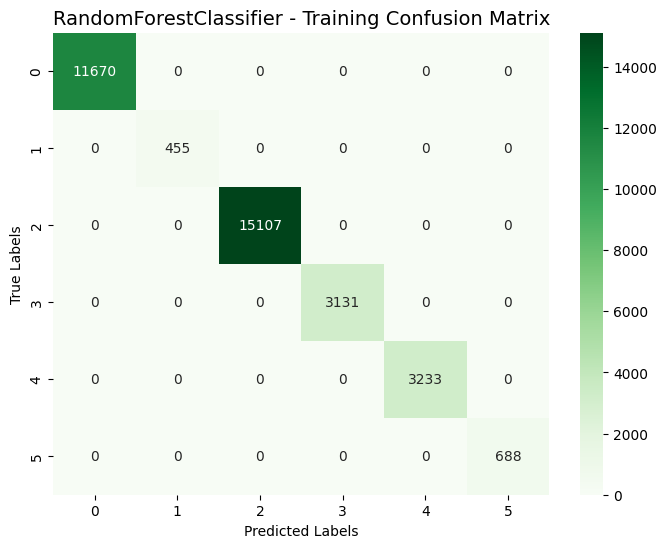


RandomForestClassifier - Testing Metrics:
Accuracy: 1.00
Classification Report (Testing):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2877
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00      3834
           3       1.00      1.00      1.00       767
           4       1.00      1.00      1.00       836
           5       0.99      1.00      1.00       160

    accuracy                           1.00      8571
   macro avg       1.00      1.00      1.00      8571
weighted avg       1.00      1.00      1.00      8571



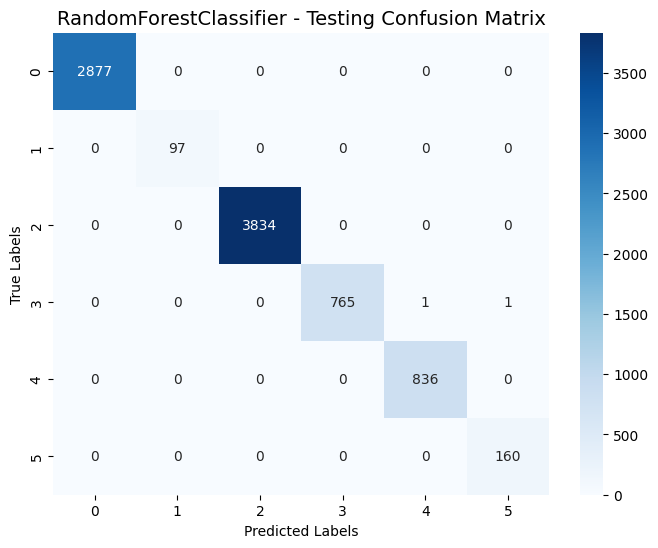

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Обучение модели
rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train_class_scaled, y_train_class)

# Прогнозирование на обучающем наборе
y_train_pred_rf_class = rf_class.predict(X_train_class_scaled)

# Оценка на обучающем наборе
print("RandomForestClassifier - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train_class, y_train_pred_rf_class):.2f}")
print("Classification Report (Training):")
print(classification_report(y_train_class, y_train_pred_rf_class))

# Матрица путаницы для обучающего набора
train_conf_matrix = confusion_matrix(y_train_class, y_train_pred_rf_class)
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('RandomForestClassifier - Training Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Прогнозирование на тестовом наборе
y_test_pred_rf_class = rf_class.predict(X_test_class_scaled)

# Оценка на тестовом наборе
print("\nRandomForestClassifier - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test_class, y_test_pred_rf_class):.2f}")
print("Classification Report (Testing):")
print(classification_report(y_test_class, y_test_pred_rf_class))

# Матрица путаницы для тестового набора
test_conf_matrix = confusion_matrix(y_test_class, y_test_pred_rf_class)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForestClassifier - Testing Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters for RandomForestClassifier: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

Optimized RandomForestClassifier - Training Metrics:
Accuracy: 1.00
Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11670
           1       1.00      1.00      1.00       455
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00      3131
           4       1.00      1.00      1.00      3233
           5       1.00      1.00      1.00       688

    accuracy                           1.00     34284
   macro avg       1.00      1.00      1.00     34284
weighted avg       1.00      1.00      1.00     34284



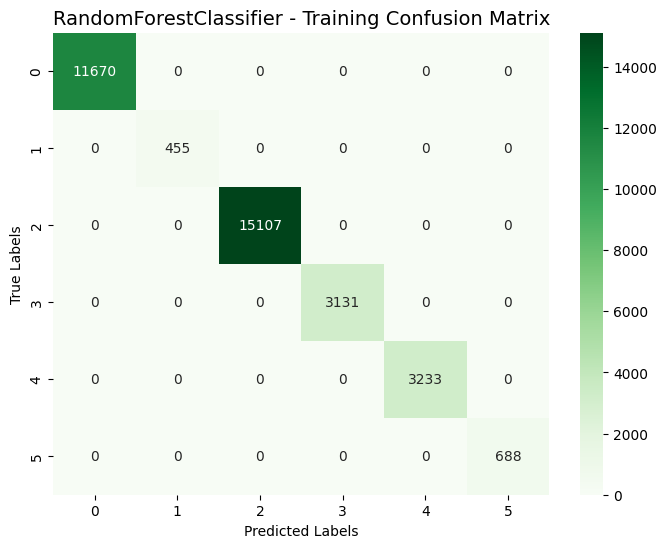


Optimized RandomForestClassifier - Testing Metrics:
Accuracy: 1.00
Classification Report (Testing):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2877
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00      3834
           3       1.00      1.00      1.00       767
           4       1.00      1.00      1.00       836
           5       1.00      1.00      1.00       160

    accuracy                           1.00      8571
   macro avg       1.00      1.00      1.00      8571
weighted avg       1.00      1.00      1.00      8571



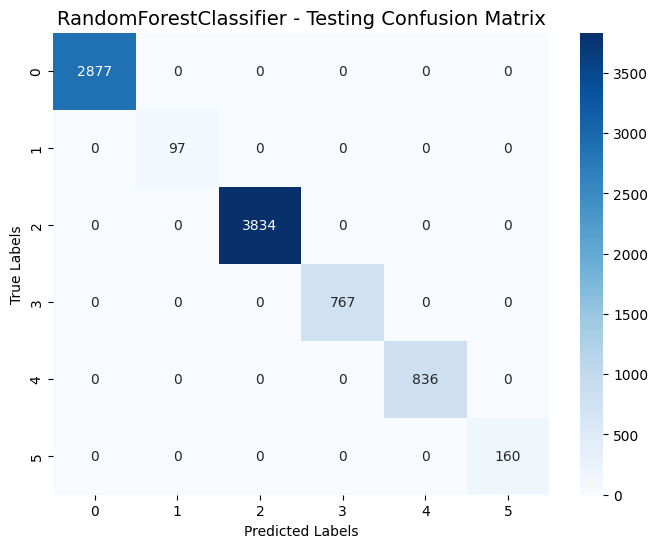

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Определяем параметры для GridSearch
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Создание модели RandomForestClassifier
rf_class = RandomForestClassifier(random_state=42)

# Поиск с перекрестной проверкой
grid_search_rf = GridSearchCV(estimator=rf_class, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_class_scaled, y_train_class)

# Выводим лучшие параметры и модель
print(f"Best parameters for RandomForestClassifier: {grid_search_rf.best_params_}")
best_rf_class = grid_search_rf.best_estimator_

# Прогнозирование на обучающем наборе с лучшей моделью
y_train_pred_rf_class = best_rf_class.predict(X_train_class_scaled)

# Оценка на обучающем наборе
print("\nOptimized RandomForestClassifier - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train_class, y_train_pred_rf_class):.2f}")
print("Classification Report (Training):")
print(classification_report(y_train_class, y_train_pred_rf_class))

# Матрица путаницы для обучающего набора
train_conf_matrix = confusion_matrix(y_train_class, y_train_pred_rf_class)
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('RandomForestClassifier - Training Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Прогнозирование на тестовом наборе с лучшей моделью
y_test_pred_rf_class = best_rf_class.predict(X_test_class_scaled)

# Оценка модели на тестовом наборе
print("\nOptimized RandomForestClassifier - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test_class, y_test_pred_rf_class):.2f}")
print("Classification Report (Testing):")
print(classification_report(y_test_class, y_test_pred_rf_class))

# Матрица путаницы для тестового набора
test_conf_matrix = confusion_matrix(y_test_class, y_test_pred_rf_class)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForestClassifier - Testing Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

LogisticRegression - Training Metrics:
Accuracy: 0.98
Classification Report (Training):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11670
           1       1.00      0.98      0.99       455
           2       0.98      1.00      0.99     15107
           3       0.99      0.96      0.98      3131
           4       0.96      0.92      0.94      3233
           5       0.98      0.96      0.97       688

    accuracy                           0.98     34284
   macro avg       0.98      0.97      0.98     34284
weighted avg       0.98      0.98      0.98     34284



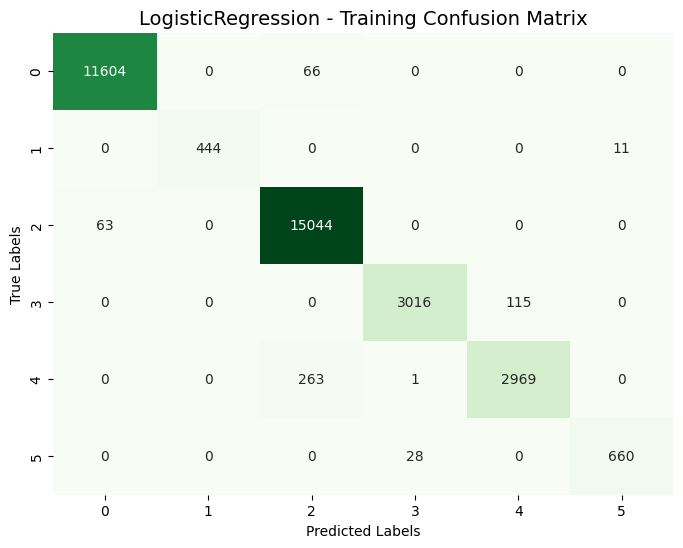


LogisticRegression - Testing Metrics:
Accuracy: 0.99
Classification Report (Testing):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2877
           1       1.00      0.97      0.98        97
           2       0.98      1.00      0.99      3834
           3       0.99      0.97      0.98       767
           4       0.97      0.93      0.95       836
           5       0.98      0.97      0.97       160

    accuracy                           0.99      8571
   macro avg       0.99      0.97      0.98      8571
weighted avg       0.99      0.99      0.99      8571



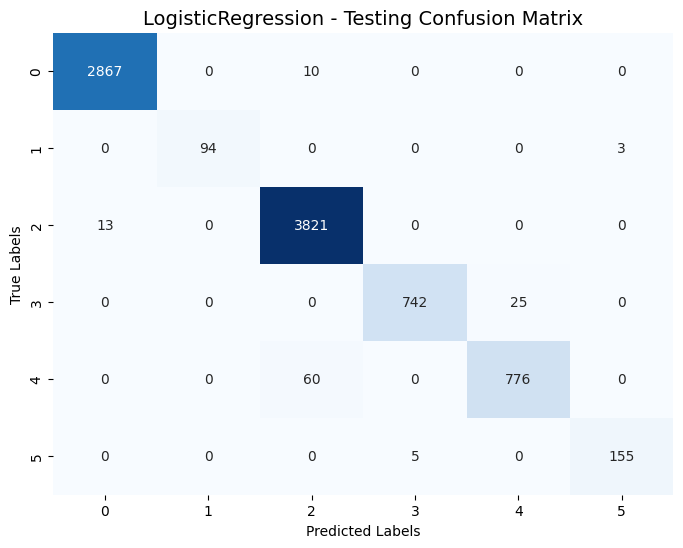

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Обучение модели
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_class_scaled, y_train_class)

# Прогнозирование на обучающем наборе
y_train_pred_log_reg = log_reg.predict(X_train_class_scaled)

# Оценка на обучающем наборе
print("LogisticRegression - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train_class, y_train_pred_log_reg):.2f}")
print("Classification Report (Training):")
print(classification_report(y_train_class, y_train_pred_log_reg))

# Матрица путаницы для обучающего набора
train_conf_matrix_log_reg = confusion_matrix(y_train_class, y_train_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix_log_reg, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('LogisticRegression - Training Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Прогнозирование на тестовом наборе
y_test_pred_log_reg = log_reg.predict(X_test_class_scaled)

# Оценка на тестовом наборе
print("\nLogisticRegression - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test_class, y_test_pred_log_reg):.2f}")
print("Classification Report (Testing):")
print(classification_report(y_test_class, y_test_pred_log_reg))

# Матрица путаницы для тестового набора
test_conf_matrix_log_reg = confusion_matrix(y_test_class, y_test_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('LogisticRegression - Testing Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\Les\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters for LogisticRegression: {'C': 100, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}

Optimized LogisticRegression - Training Metrics:
Accuracy: 1.00
Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11670
           1       1.00      0.99      0.99       455
           2       1.00      1.00      1.00     15107
           3       1.00      1.00      1.00      3131
           4       1.00      1.00      1.00      3233
           5       0.99      1.00      0.99       688

    accuracy                           1.00     34284
   macro avg       1.00      1.00      1.00     34284
weighted avg       1.00      1.00      1.00     34284



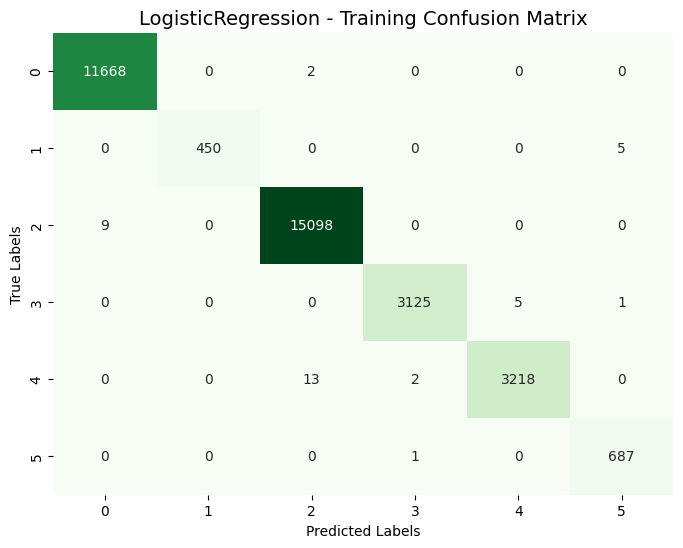


Optimized LogisticRegression - Testing Metrics:
Accuracy: 1.00
Classification Report (Testing):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2877
           1       1.00      0.98      0.99        97
           2       1.00      1.00      1.00      3834
           3       1.00      0.99      1.00       767
           4       1.00      1.00      1.00       836
           5       0.98      1.00      0.99       160

    accuracy                           1.00      8571
   macro avg       1.00      1.00      1.00      8571
weighted avg       1.00      1.00      1.00      8571



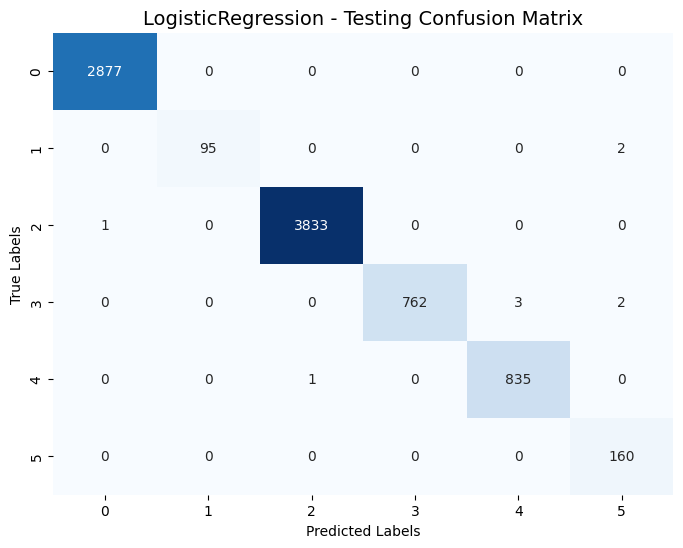

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Определяем параметры для GridSearch
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],  # Регуляризационный параметр
    'solver': ['saga', 'lbfgs'],  # Алгоритмы оптимизации для многоклассовой задачи
    'max_iter': [100, 200, 300],  # Количество итераций
    'penalty': ['l2'],  # Тип регуляризации
    'multi_class': ['multinomial']  # Стратегия многоклассовой классификации
}

# Создание модели LogisticRegression
log_reg = LogisticRegression(random_state=42)

# Поиск с перекрестной проверкой
grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=3, n_jobs=-1, verbose=2)
grid_search_log_reg.fit(X_train_class_scaled, y_train_class)

# Выводим лучшие параметры и модель
print(f"Best parameters for LogisticRegression: {grid_search_log_reg.best_params_}")
best_log_reg = grid_search_log_reg.best_estimator_

# Прогнозирование на обучающем наборе с лучшей моделью
y_train_pred_log_reg = best_log_reg.predict(X_train_class_scaled)

# Оценка на обучающем наборе
print("\nOptimized LogisticRegression - Training Metrics:")
print(f"Accuracy: {accuracy_score(y_train_class, y_train_pred_log_reg):.2f}")
print("Classification Report (Training):")
print(classification_report(y_train_class, y_train_pred_log_reg))

# Матрица путаницы для обучающего набора
train_conf_matrix_log_reg = confusion_matrix(y_train_class, y_train_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix_log_reg, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('LogisticRegression - Training Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Прогнозирование на тестовом наборе с лучшей моделью
y_test_pred_log_reg = best_log_reg.predict(X_test_class_scaled)

# Оценка модели на тестовом наборе
print("\nOptimized LogisticRegression - Testing Metrics:")
print(f"Accuracy: {accuracy_score(y_test_class, y_test_pred_log_reg):.2f}")
print("Classification Report (Testing):")
print(classification_report(y_test_class, y_test_pred_log_reg))

# Матрица путаницы для тестового набора
test_conf_matrix_log_reg = confusion_matrix(y_test_class, y_test_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('LogisticRegression - Testing Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [20]:
import joblib

# Сохраняем модели
joblib.dump(best_gb_model, 'rf_regressor_model.joblib')
joblib.dump(best_gb_model, 'gb_regressor_model.joblib')
joblib.dump(best_rf_class, 'rf_classifier_model.joblib')
joblib.dump(best_log_reg, 'log_regressor_model.joblib')

# Сохраняем скейлеры (если использовали для масштабирования данных)
joblib.dump(scaler_reg, 'scaler_regressor.joblib')
joblib.dump(scaler_class, 'scaler_classifier.joblib')

print("Models and scalers have been saved successfully.")

Models and scalers have been saved successfully.


In [22]:
import joblib

# Загружаем модели и скейлеры
best_rf_reg = joblib.load('rf_regressor_model.joblib')
best_gb_reg = joblib.load('gb_regressor_model.joblib')
best_rf_class = joblib.load('rf_classifier_model.joblib')
best_log_reg = joblib.load('log_regressor_model.joblib')

scaler_reg = joblib.load('scaler_regressor.joblib')
scaler_class = joblib.load('scaler_classifier.joblib')

# Пример новых данных для прогнозирования (одни и те же данные для регрессии и классификации)
new_data = pd.DataFrame({
    'NowCast Conc.': [46.5],  # Пример новых данных
    'Year': [2024],
    'Month': [12],
    'Day': [12],
    'Hour': [12]
})

# Масштабирование данных для регрессии
new_data_reg_scaled = scaler_reg.transform(new_data)

# Прогнозирование на новых данных для регрессии
rf_reg_pred = best_rf_reg.predict(new_data_reg_scaled)
gb_reg_pred = best_gb_reg.predict(new_data_reg_scaled)

# Вывод прогнозов для регрессии
print("Predicted AQI (RandomForestRegressor):", rf_reg_pred)
print("Predicted AQI (GradientBoostingRegressor):", gb_reg_pred)

# Масштабирование данных для классификации
new_data_class_scaled = scaler_class.transform(new_data)

# Прогнозирование на новых данных для классификации
rf_class_pred = best_rf_class.predict(new_data_class_scaled)
log_class_pred = best_log_reg.predict(new_data_class_scaled)

# Вывод прогнозов для классификации
print("Predicted AQI Category (RandomForestClassifier):", rf_class_pred)
print("Predicted AQI Category (LogisticRegression):", log_class_pred)


Predicted AQI (RandomForestRegressor): [128.01537472]
Predicted AQI (GradientBoostingRegressor): [128.01537472]
Predicted AQI Category (RandomForestClassifier): [4]
Predicted AQI Category (LogisticRegression): [4]
